In [ ]:
!pip install visualkeras
!pip install scikit-plot
import visualkeras
import scikitplot as skplt



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report



In [ ]:
#mount drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


<h1>Loading image data and augmenting</h1>

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/train',
                                                     target_size=(256, 256),
                                                     batch_size=32,
                                                     class_mode='sparse',
                                                     seed=123)
test_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(256, 256),
                                                     batch_size=32,
                                                     class_mode='sparse',
                                                     seed=123)

print(train_gen.class_indices)
print(test_gen.class_indices)
from collections import Counter

counter = Counter(train_gen.classes)

print(counter.items()) 

Found 12132 images belonging to 4 classes.
Found 2873 images belonging to 4 classes.
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
dict_items([(0, 4330), (1, 4306), (2, 2326), (3, 1170)])


In [ ]:
counter = Counter(test_gen.classes)

print(counter.items()) 

dict_items([(0, 1091), (1, 1039), (2, 556), (3, 187)])


<h2>Custom CNN Model </h2>

In [ ]:
model = Sequential()
#first conv layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'valid', input_shape = (256, 256, 3)))
model.add(Activation('relu'))
#first maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#second conv layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation('relu'))
#second maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#third convolutional layer
model.add(Conv2D(filters = 64, kernel_size =(3, 3)))
model.add(Activation('relu'))
#third maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#fourth convolutional layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3)))
model.add(Activation('relu'))
#fourth maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#fifth convolutional
model.add(Conv2D(filters = 256, kernel_size = (3, 3)))
#fully connected component

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 activation (Activation)     (None, 254, 254, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

In [ ]:
history = model.fit_generator(
    train_gen, epochs = 50, validation_data = test_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
380/380 [==============================] - 6886s 18s/step - loss: 0.7512 - accuracy: 0.7035 - val_loss: 0.5264 - val_accuracy: 0.8207
Epoch 2/50
380/380 [==============================] - 265s 697ms/step - loss: 0.5258 - accuracy: 0.8167 - val_loss: 0.4572 - val_accuracy: 0.8552
Epoch 3/50
380/380 [==============================] - 265s 696ms/step - loss: 0.4044 - accuracy: 0.8689 - val_loss: 0.3047 - val_accuracy: 0.8897
Epoch 4/50
380/380 [==============================] - 264s 694ms/step - loss: 0.3486 - accuracy: 0.8845 - val_loss: 0.2806 - val_accuracy: 0.8837
Epoch 5/50
380/380 [==============================] - 263s 693ms/step - loss: 0.3304 - accuracy: 0.9032 - val_loss: 0.1641 - val_accuracy: 0.9387
Epoch 6/50
380/380 [==============================] - 263s 693ms/step - loss: 0.2471 - accuracy: 0.9227 - val_loss: 0.1381 - val_accuracy: 0.9523
Epoch 7/50
380/380 [==============================] - 264s 694ms/step - loss: 0.1932 - accuracy: 0.9430 - val_loss: 0.1056 - 

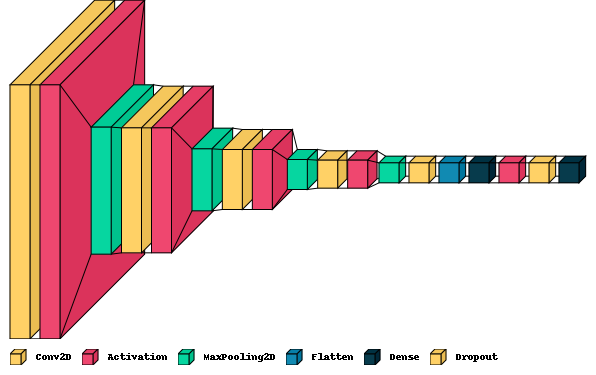

In [ ]:
from PIL import ImageFont
visualkeras.layered_view(model, scale_xy=1, scale_z=1, max_z=20, legend =  True, to_file = 'output.png')
# visualkeras.layered_view(model, legend=True)
# visualkeras.layered_view(model, to_file='output.png') # write to disk


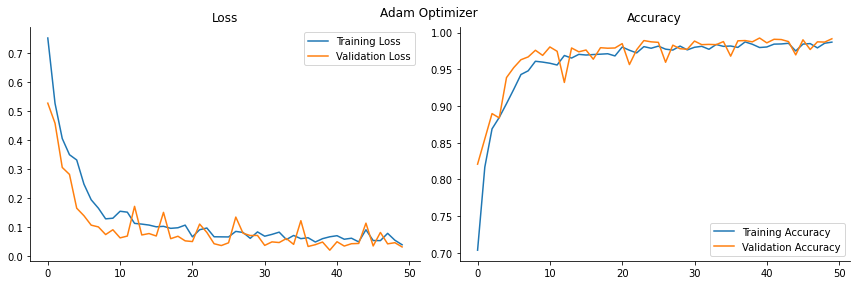

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["loss"], 
             ax = axes[0], label = "Training Loss")

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["val_loss"], 
             ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["accuracy"], 
             ax = axes[1], label = "Training Accuracy")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["val_accuracy"], 
             ax = axes[1], label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")
fig.suptitle("Adam Optimizer")

plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
model.load_weights("weights.h5")

In [ ]:
model.save_weights('weights.h5')

<h2> Confusion Matrix</h2>

In [ ]:
test_gen_new = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(256, 256),
                                                     batch_size=1,
                                                     class_mode='sparse',
                                                     shuffle = False)

Found 2873 images belonging to 4 classes.


In [ ]:
y_pred = model.predict_generator(test_gen_new)
data = y_pred.copy()
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


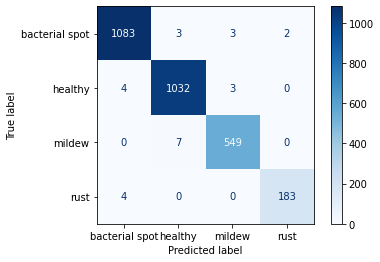

In [ ]:
cm = confusion_matrix(test_gen_new.classes, y_pred)
labels = ["bacterial spot","healthy", "mildew", "rust"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
accuracy_score(test_gen_new.classes, y_pred)

0.9909502262443439

In [ ]:
print(classification_report(test_gen_new.classes, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1091
           1       0.99      0.99      0.99      1039
           2       0.99      0.99      0.99       556
           3       0.99      0.98      0.98       187

    accuracy                           0.99      2873
   macro avg       0.99      0.99      0.99      2873
weighted avg       0.99      0.99      0.99      2873



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


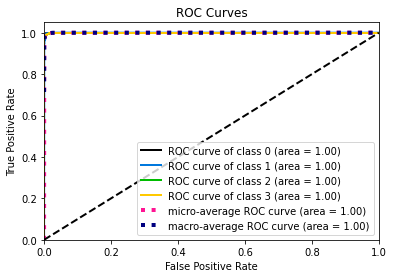

In [ ]:
skplt.metrics.plot_roc_curve(test_gen_new.classes, data)
plt.show()

In [ ]:
model.save('mymodel')

INFO:tensorflow:Assets written to: mymodel/assets


In [ ]:
from tensorflow.keras.utils import plot_model

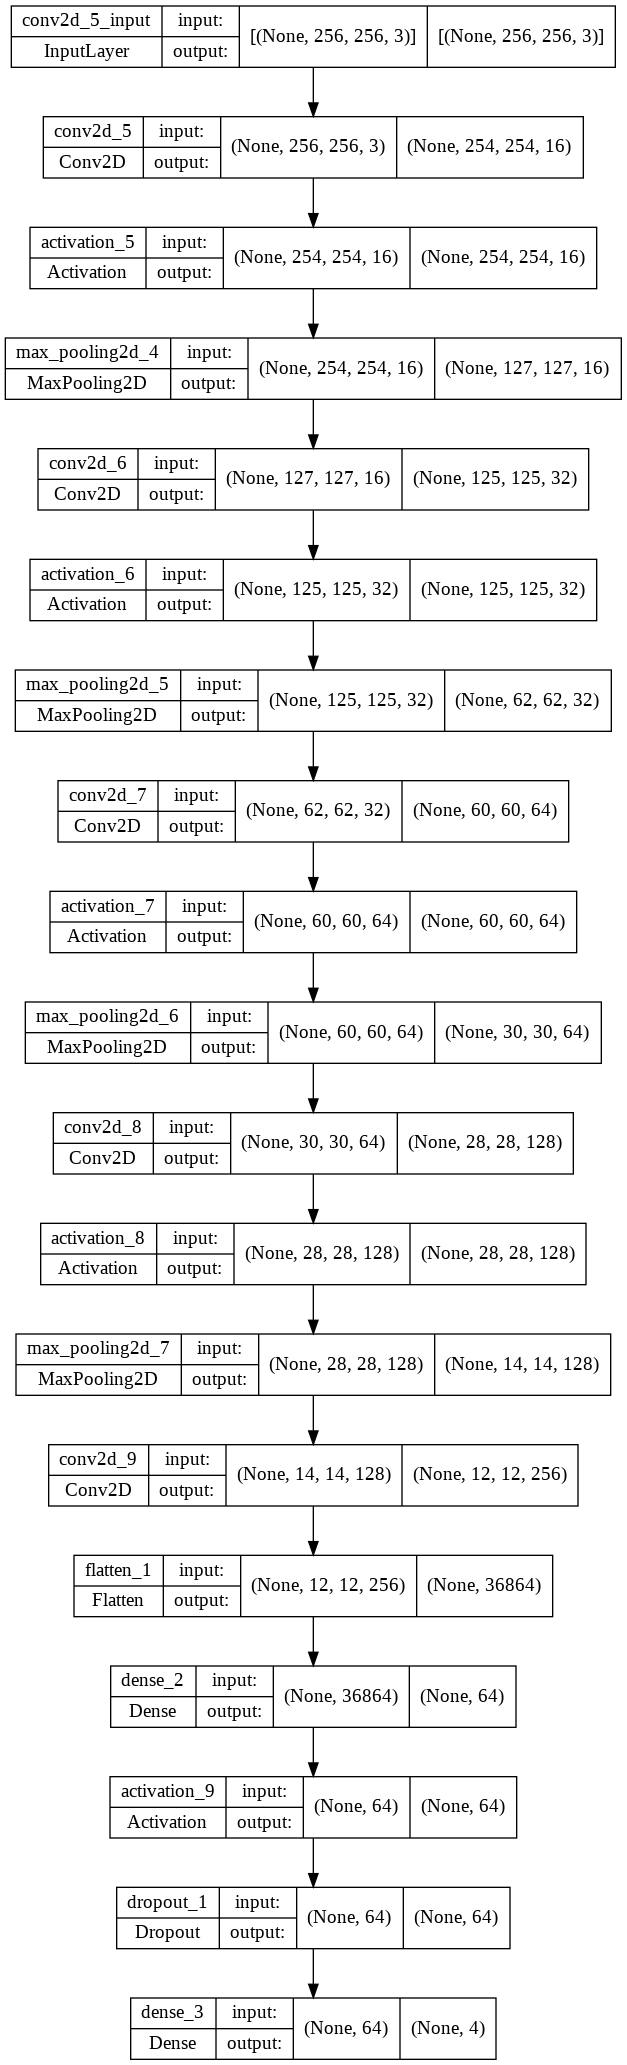

In [ ]:
plot_model(model, to_file="mymodel.png", show_shapes=True)

In [ ]:
!zip -r mymodel.zip mymodel

  adding: mymodel/ (stored 0%)
  adding: mymodel/assets/ (stored 0%)
  adding: mymodel/saved_model.pb (deflated 90%)
  adding: mymodel/keras_metadata.pb (deflated 93%)
  adding: mymodel/variables/ (stored 0%)
  adding: mymodel/variables/variables.index (deflated 68%)
  adding: mymodel/variables/variables.data-00000-of-00001 (deflated 9%)


<h2>Comparison with other state of the art models</h2>

<h2>1>MobileNetV2</h2>

In [ ]:
train_gen_new = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/train',
                                                     target_size=(224, 224),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)
test_gen_new = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(224, 224),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)

print(train_gen_new.class_indices)
print(test_gen_new.class_indices)
from collections import Counter

counter = Counter(train_gen_new.classes)

print(counter.items()) 

Found 12132 images belonging to 4 classes.
Found 2873 images belonging to 4 classes.
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
dict_items([(0, 4330), (1, 4306), (2, 2326), (3, 1170)])


In [ ]:
mobile_netv2 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
x = mobile_netv2.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x) 
x = Dense(64,activation='relu')(x)   
preds = Dense(4,activation='softmax')(x)

model2=Model(inputs=mobile_netv2.input,outputs=preds)

In [ ]:
mobile_netv2.trainable = False

In [ ]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit_generator(
    train_gen_new, epochs = 13, validation_data = test_gen_new
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/13
95/95 [==============================] - 420s 4s/step - loss: 0.1959 - accuracy: 0.9291 - val_loss: 0.0454 - val_accuracy: 0.9871
Epoch 2/13
95/95 [==============================] - 46s 485ms/step - loss: 0.0340 - accuracy: 0.9904 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 3/13
95/95 [==============================] - 47s 494ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0250 - val_accuracy: 0.9920
Epoch 4/13
95/95 [==============================] - 47s 494ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.0273 - val_accuracy: 0.9896
Epoch 5/13
95/95 [==============================] - 47s 499ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0228 - val_accuracy: 0.9916
Epoch 6/13
95/95 [==============================] - 47s 493ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0183 - val_accuracy: 0.9937
Epoch 7/13
95/95 [==============================] - 47s 493ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0213 - val_accuracy: 0.9934
E

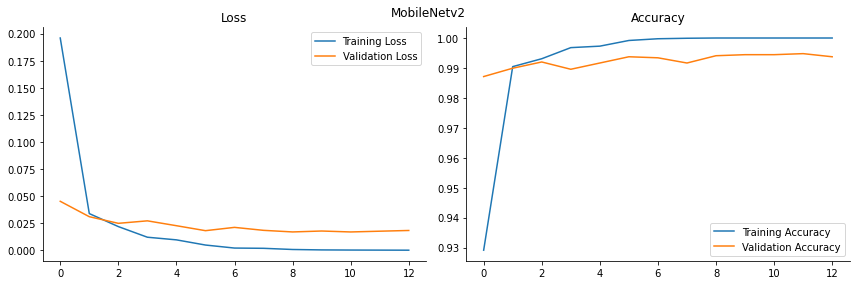

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["loss"], 
             ax = axes[0], label = "Training Loss")

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["val_loss"], 
             ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["accuracy"], 
             ax = axes[1], label = "Training Accuracy")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["val_accuracy"], 
             ax = axes[1], label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")
fig.suptitle("MobileNetv2")

plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
test_gen_new = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(254, 254),
                                                     batch_size=1,
                                                     class_mode='sparse',
                                                     shuffle = False)

Found 2873 images belonging to 4 classes.


In [ ]:
y_pred = model2.predict_generator(test_gen_new)
data = y_pred.copy()
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


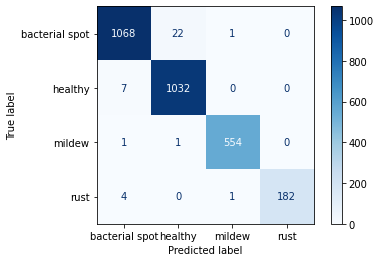

In [ ]:
cm = confusion_matrix(test_gen_new.classes, y_pred)
labels = ["bacterial spot","healthy", "mildew", "rust"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
accuracy_score(test_gen_new.classes, y_pred)

0.9662373825269753

In [ ]:
print(classification_report(test_gen_new.classes, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1091
           1       0.98      0.99      0.99      1039
           2       1.00      1.00      1.00       556
           3       1.00      0.97      0.99       187

    accuracy                           0.99      2873
   macro avg       0.99      0.99      0.99      2873
weighted avg       0.99      0.99      0.99      2873



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


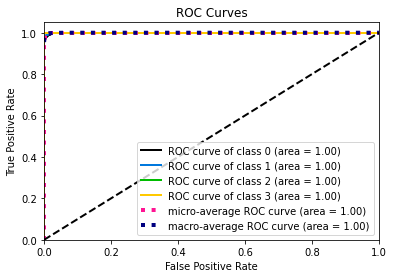

In [ ]:
skplt.metrics.plot_roc_curve(test_gen_new.classes, data)
plt.show()

<h2>2>VGG19</h2>

In [ ]:
train_gen_new = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/train',
                                                     target_size=(224, 224),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)
test_gen_new = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(224, 224),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)

print(train_gen_new.class_indices)
print(test_gen_new.class_indices)
from collections import Counter

counter = Counter(train_gen_new.classes)

print(counter.items()) 

Found 12132 images belonging to 4 classes.
Found 2873 images belonging to 4 classes.
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
dict_items([(0, 4330), (1, 4306), (2, 2326), (3, 1170)])


In [ ]:
vgg19 = tf.keras.applications.vgg19.VGG19(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
x = vgg19.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x) 
x = Dense(64,activation='relu')(x)   
preds = Dense(4,activation='softmax')(x)

model3=Model(inputs=vgg19.input,outputs=preds)

In [ ]:
vgg19.trainable=False

In [ ]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model3.fit_generator(
    train_gen_new, epochs = 13, validation_data = test_gen_new
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/13
95/95 [==============================] - 4603s 48s/step - loss: 0.7995 - accuracy: 0.7068 - val_loss: 0.4285 - val_accuracy: 0.8778
Epoch 2/13
95/95 [==============================] - 96s 1s/step - loss: 0.3292 - accuracy: 0.8947 - val_loss: 0.2615 - val_accuracy: 0.9123
Epoch 3/13
95/95 [==============================] - 96s 1s/step - loss: 0.2277 - accuracy: 0.9238 - val_loss: 0.2016 - val_accuracy: 0.9314
Epoch 4/13
95/95 [==============================] - 96s 1s/step - loss: 0.1944 - accuracy: 0.9322 - val_loss: 0.1746 - val_accuracy: 0.9433
Epoch 5/13
95/95 [==============================] - 96s 1s/step - loss: 0.1592 - accuracy: 0.9457 - val_loss: 0.1708 - val_accuracy: 0.9387
Epoch 6/13
95/95 [==============================] - 96s 1s/step - loss: 0.1384 - accuracy: 0.9526 - val_loss: 0.1302 - val_accuracy: 0.9554
Epoch 7/13
95/95 [==============================] - 96s 1s/step - loss: 0.1201 - accuracy: 0.9595 - val_loss: 0.1206 - val_accuracy: 0.9520
Epoch 8/13
95/95 

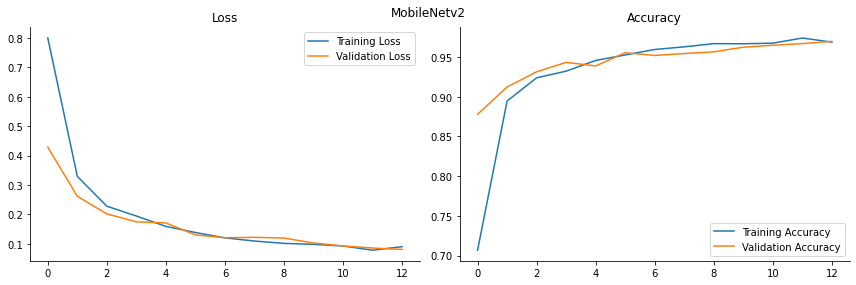

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["loss"], 
             ax = axes[0], label = "Training Loss")

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["val_loss"], 
             ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["accuracy"], 
             ax = axes[1], label = "Training Accuracy")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["val_accuracy"], 
             ax = axes[1], label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")
fig.suptitle("MobileNetv2")

plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
test_gen_new = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(254, 254),
                                                     batch_size=1,
                                                     class_mode='sparse',
                                                     shuffle = False)

Found 2873 images belonging to 4 classes.


In [ ]:
y_pred = model3.predict_generator(test_gen_new)
data = y_pred.copy()
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


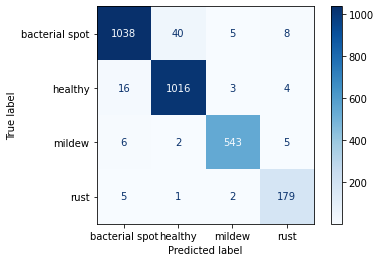

In [ ]:
cm = confusion_matrix(test_gen_new.classes, y_pred)
labels = ["bacterial spot","healthy", "mildew", "rust"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
accuracy_score(test_gen_new.classes, y_pred)

0.9662373825269753

In [ ]:
print(classification_report(test_gen_new.classes, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1091
           1       0.96      0.98      0.97      1039
           2       0.98      0.98      0.98       556
           3       0.91      0.96      0.93       187

    accuracy                           0.97      2873
   macro avg       0.96      0.97      0.96      2873
weighted avg       0.97      0.97      0.97      2873



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


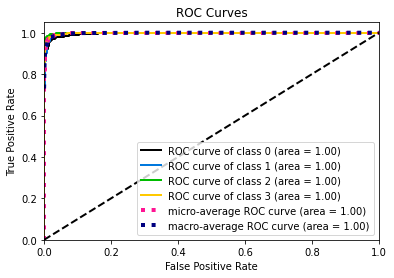

In [ ]:
skplt.metrics.plot_roc_curve(test_gen_new.classes, data)
plt.show()